<a href="https://colab.research.google.com/github/Mwangi-Gichuki/Autolib/blob/master/DSC4_WEEK21P_MICHAEL_GICHUKI_STATISTICAL_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries to be used for the Analysis

In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import scipy.stats as st

from scipy.stats import norm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


 **Univariate Analysis**

1. Defining the Question

**a.Specifying the Question**

What is the most common Job type in the region



2. Loading the Data

In [2]:
# Dataset url =  http://bit.ly/FinancialDataset

df = pd.read_csv("http://bit.ly/FinancialDataset")

# To display the top 5 rows
df.head(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [19]:
# To display the bottom 5 rows
df.tail(5) 

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


3.Checking the Data

In [20]:
# Checking the data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [21]:
# Total number of rows and columns
df.shape

(23524, 13)

In [3]:
# Dropping irrelevant columns
df = df.drop('uniqueid', axis=1)
df.head(5)


,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
# Renaming the column names
df = df.rename(columns={"Has a Bank account": "Has_a_Bank_account", "Type of Location": "Type_of_Location", "Cell Phone Access": "Cell_Phone_Access", "Respondent Age": "Respondent_Age","The relathip with head": "The_relationship_with_head", "Level of Educuation": "Level_of_Educuation", "Type of Job": "Type_of_Job" })
df.head(5)

,country,year,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,The_relationship_with_head,marital_status,Level_of_Educuation,Type_of_Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
%timeit
# Replacing the 'Yes' and 'No' to 1 and 0 for ease of analysis
df['Has_a_Bank_account'] = df['Has_a_Bank_account'].apply(lambda x: 0 if x=='No' else 1)

df.head()


,country,year,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,The_relationship_with_head,marital_status,Level_of_Educuation,Type_of_Job
0,Kenya,2018,1,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,0,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,1,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,0,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,0,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [6]:
# Replacing the 'Yes' and 'No' to 1 and 0 for ease of analysis
df['Cell_Phone_Access'] = df['Cell_Phone_Access'].apply(lambda x: 0 if x=='No' else 1)

df.head()

,country,year,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,The_relationship_with_head,marital_status,Level_of_Educuation,Type_of_Job
0,Kenya,2018,1,Rural,1,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,0,Rural,0,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,1,Urban,1,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,0,Rural,1,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,0,Urban,0,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (4374, 12)


In [ ]:
# Finding the null values.
print(df.isnull().sum())

country                       14
year                           0
Has_a_Bank_account             0
Type_of_Location              15
Cell_Phone_Access              0
household_size                28
Respondent_Age                34
gender_of_respondent          34
The_relationship_with_head     4
marital_status                32
Level_of_Educuation           29
Type_of_Job                   30
dtype: int64


In [ ]:
# Dropping the missing values.
df = df.dropna() 
df.count()

country                       23368
year                          23368
Has_a_Bank_account            23368
Type_of_Location              23368
Cell_Phone_Access             23368
household_size                23368
Respondent_Age                23368
gender_of_respondent          23368
The_relationship_with_head    23368
marital_status                23368
Level_of_Educuation           23368
Type_of_Job                   23368
dtype: int64

4. External Data Source Validation

The data can be validate against the following data sets:

[FinAccess Kenya 2018.](https://fsdkenya.org/publication/finaccess2019/)

[Finscope Rwanda 2016](http://www.statistics.gov.rw/publication/finscope-rwanda-2016)

[Finscope Tanzania 2017](http://www.fsdt.or.tz/finscope/)

[Finscope Uganda 2018](http://fsduganda.or.ug/finscope-2018-survey-report/)

5. Tidying the Dataset

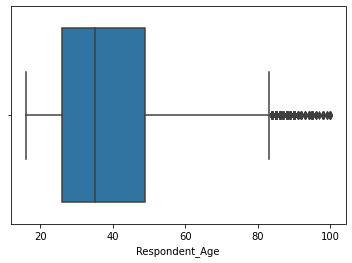

In [ ]:
# Checking for outliers in the respondents age.
# 
sns.boxplot(x=df['Respondent_Age'])


Outliers observed are normal in an age dataset

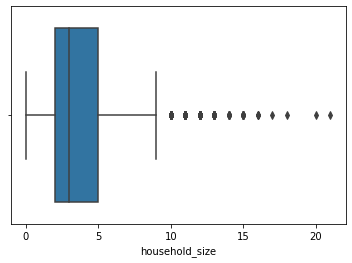

In [ ]:
# Checking for outliers in the household_size	

sns.boxplot(x=df['household_size'])

Outliers observed are normal in an household dataset

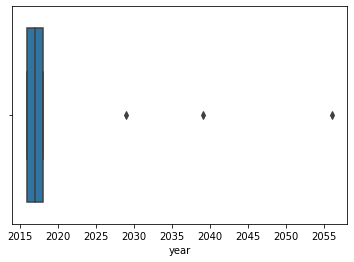

In [ ]:
sns.boxplot(x=df['year'])
# Outliers noted are not in line with the description of the data and should therefore be dropped.

In [ ]:
#Dealing with the outliers observed in the year column
index = df[(df['year'] >= 2020)|(df['year'] <= 2013)].index
df.drop(index, inplace=True)
df['year'].describe()

count    15183.000000
mean      2016.428110
std          0.494821
min       2016.000000
25%       2016.000000
50%       2016.000000
75%       2017.000000
max       2017.000000
Name: year, dtype: float64

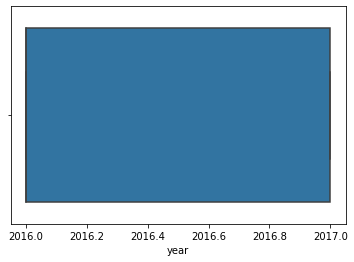

In [ ]:
sns.boxplot(x=df['year'])

6. Exploratory Analysis

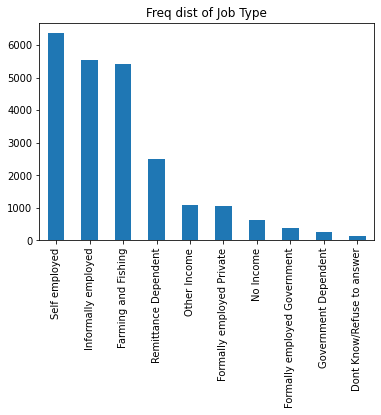

In [ ]:
# Plotting a Histogram
df['Type_of_Job'].value_counts().plot.bar(title='Freq dist of Job Type')

The most common type observed from the respondents is "self employed"

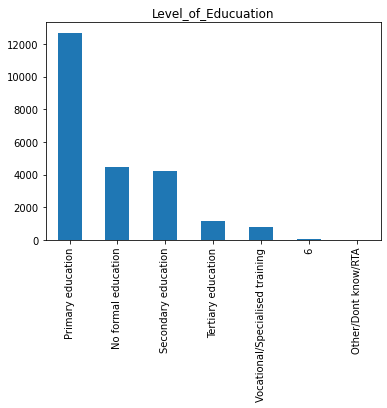

In [ ]:
df['Level_of_Educuation'].value_counts().plot.bar(title='Freq dist Level of Educuation')

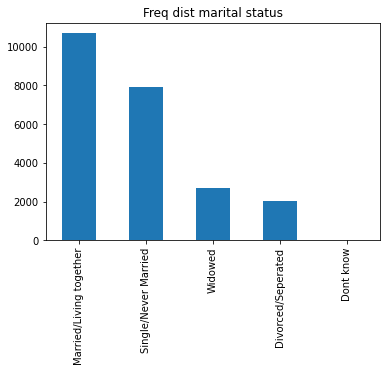

In [ ]:
df['marital_status'].value_counts().plot.bar(title='Freq dist marital status')

In [ ]:
#Mean, mode,median and quartile for age 
df['Respondent_Age'].describe()

count    23490.000000
mean        38.804300
std         16.519996
min         16.000000
25%         26.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: Respondent_Age, dtype: float64

In [ ]:
#Mean, mode,median and quartile for Household size
df['household_size'].describe()


count    23496.000000
mean         3.681818
std          2.279933
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         21.000000
Name: household_size, dtype: float64

In [ ]:
df["Respondent_Age"].median() 

35.0

In [ ]:
# 
df.Has_a_Bank_account.value_counts()

0    20179
1     3345
Name: Has_a_Bank_account, dtype: int64

In [ ]:
df.Cell_Phone_Access.value_counts()

1    17460
0     6064
Name: Cell_Phone_Access, dtype: int64

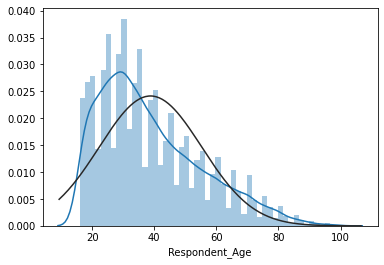

In [ ]:
sns.distplot(df['Respondent_Age'], fit = norm)

**Bivariate Analysis**

Specifying the question

Is there a relationship between the age of the respondent and the size of the household


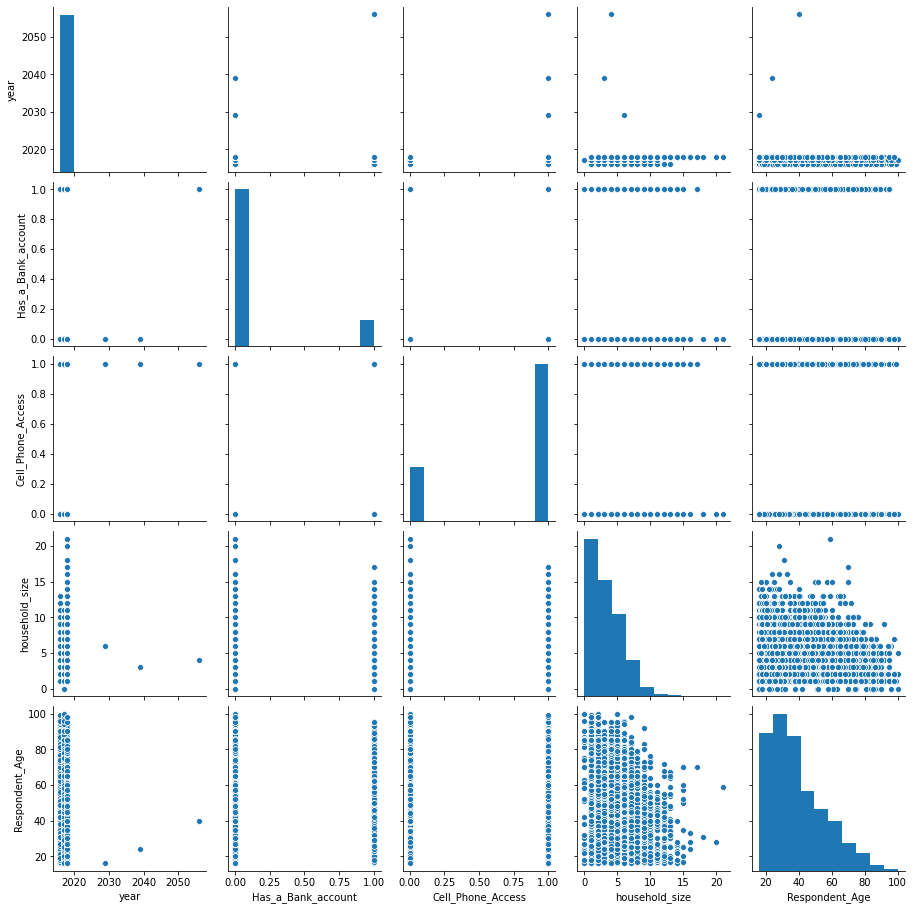

In [ ]:
sns.pairplot(df)
plt.show()

No correlation is observed between household size and respondent age as the points are scattered throughout the graph


In [ ]:
# Calculating the pearson coefficient
df["Respondent_Age"].corr(df['Has_a_Bank_account']) 

0.018467454510547224

There is weak positive correlation between the respodent having a bank account and their age 

In [ ]:
# Calculating the pearson coefficient
df["household_size"].corr(df['Has_a_Bank_account']) 

-0.024885714843180792


There is weak negative correlation between the respodent having a bank account and the size of their family


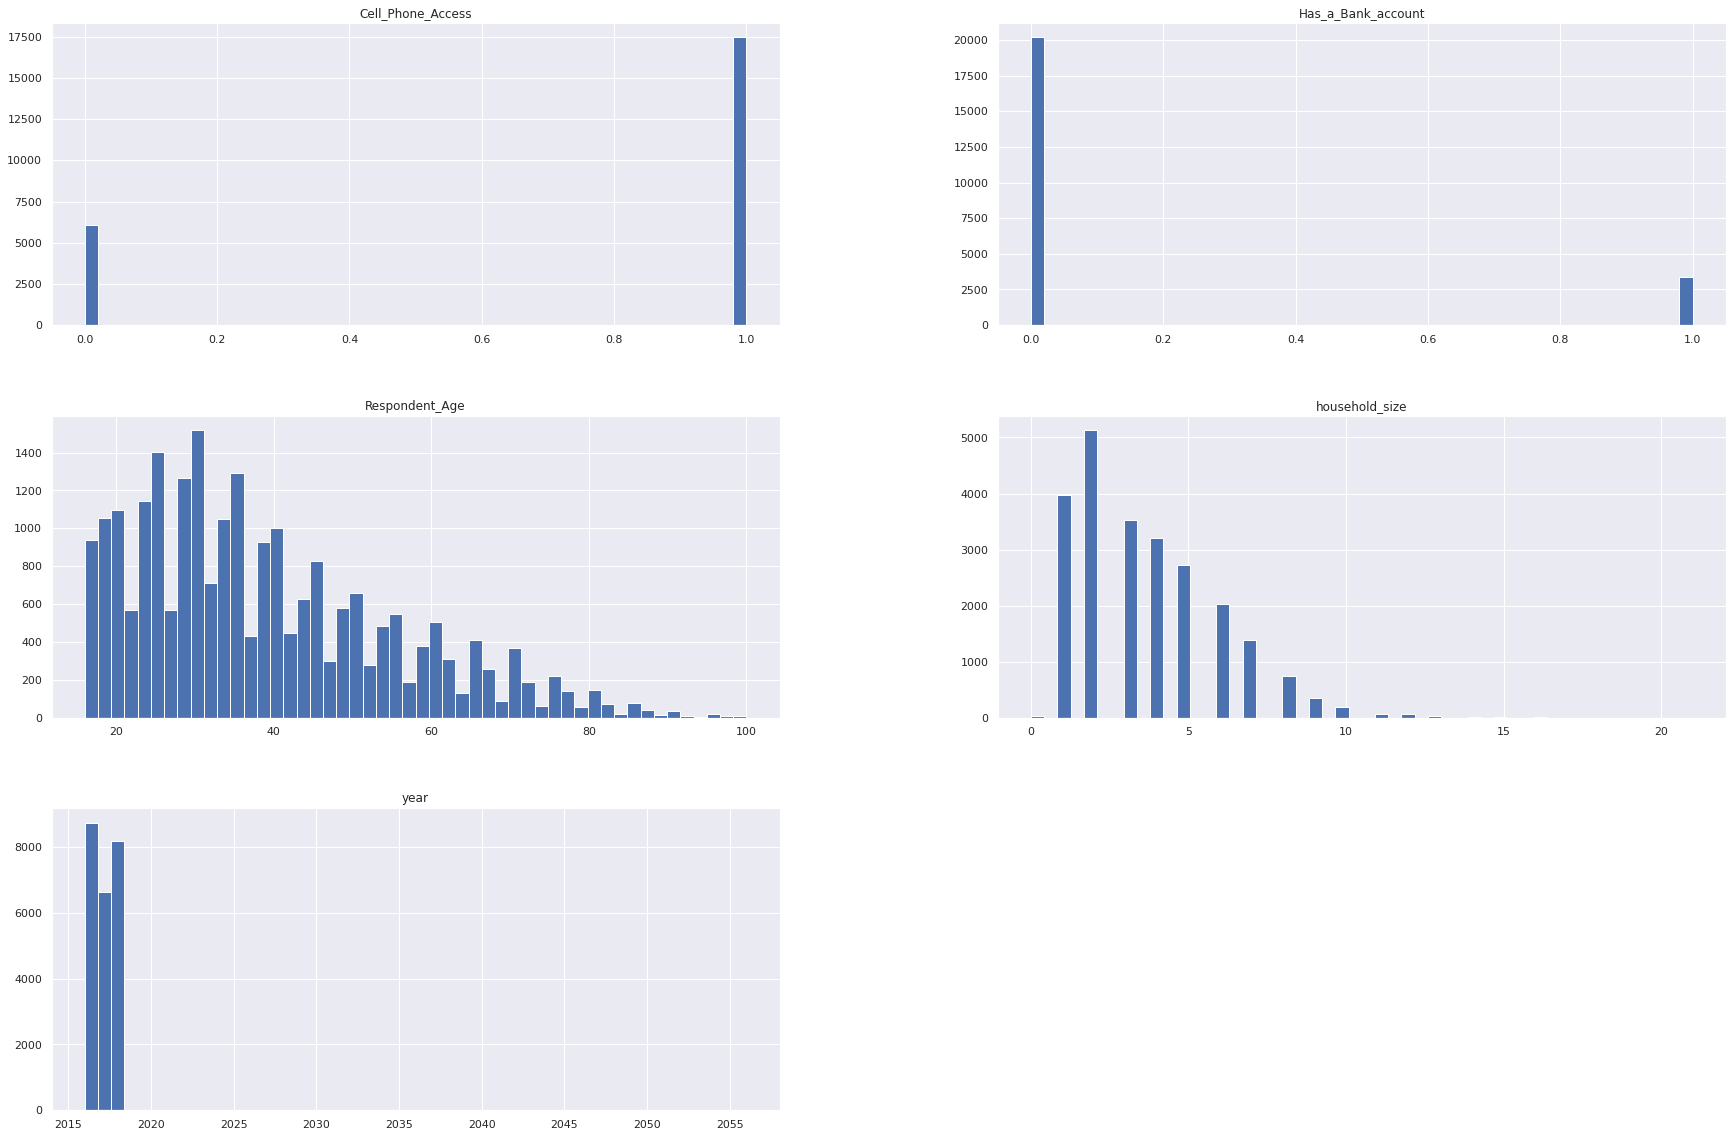

In [ ]:
df.hist(bins=50, figsize=(30,20));

**Multivariate Analysis**

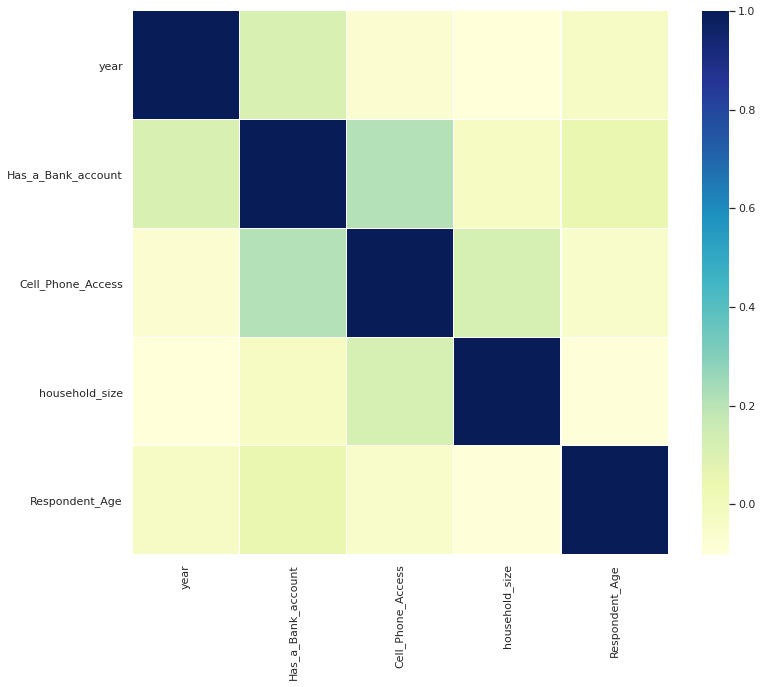

In [ ]:
corrmat = df.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1)

In [7]:
df = df.drop(['country','Type_of_Location','The_relationship_with_head','Level_of_Educuation','Type_of_Job','gender_of_respondent','marital_status'], axis=1)
X = df.drop('household_size', 1)
y = df['household_size']
df.head()

,year,Has_a_Bank_account,Cell_Phone_Access,household_size,Respondent_Age
0,2018,1,1,3.0,24.0
1,2018,0,0,5.0,70.0
2,2018,1,1,5.0,26.0
3,2018,0,1,5.0,34.0
4,2018,0,0,8.0,26.0


In [14]:
  pip install factor_analyzer==0.2.3

In [30]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer import FactorAnalyzer

chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(2417.004652897108, 0.0)

In [32]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(df)

In [40]:
# Creating factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(df, 5, rotation=None)
ev, v = fa.get_eigenvalues()
ev


,Original_Eigenvalues
0,1.264215
1,1.150992
2,1.007224
3,0.869057
4,0.708513


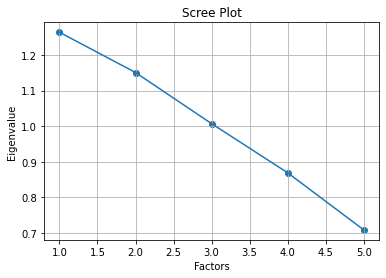

In [41]:
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [43]:
fa = FactorAnalyzer()
fa.analyze(df, 5, rotation="varimax")
fa.loadings

,Factor1,Factor2,Factor3,Factor4,Factor5
year,0.026314,-0.063528,0.440971,-0.028766,0.0
Has_a_Bank_account,0.521168,-0.025528,0.219234,0.097202,0.0
Cell_Phone_Access,0.512160,0.109154,-0.165684,-0.204422,0.0
household_size,0.031716,0.328560,-0.077146,-0.165283,0.0
Respondent_Age,-0.026264,-0.179365,-0.043546,0.381407,0.0


In [44]:
fa.get_factor_variance()

,Factor1,Factor2,Factor3,Factor4,Factor5
SS Loadings,0.536312,0.156725,0.277818,0.224854,0.000000
Proportion Var,0.107262,0.031345,0.055564,0.044971,0.000000
Cumulative Var,0.107262,0.138607,0.194171,0.239142,0.239142
